In [ ]:
# A short tutorial for Data Analysis on the [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset
# Import base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download and parse the Iris dataset
ds = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",
                 header="infer", names=["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm", "species"])
ds.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# View the dataset shape
print(ds.shape)

(150, 5)


In [4]:
# Get more info of the dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     150 non-null float64
species            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [5]:
# Get the dataset column descriptions
print(ds.describe())

       sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      150.000000
mean          5.843333        3.057333         3.758000        1.199333
std           0.828066        0.435866         1.765298        0.762238
min           4.300000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.300000
50%           5.800000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000


In [8]:
# View values distribution within the `species` column
print(ds.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


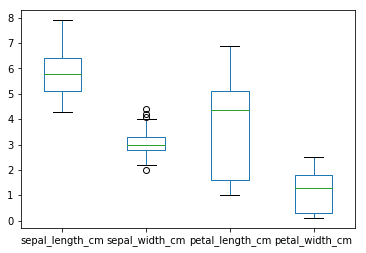

In [9]:
# Create box and whisker plots
ds.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb80a474550>,
      dtype=object)

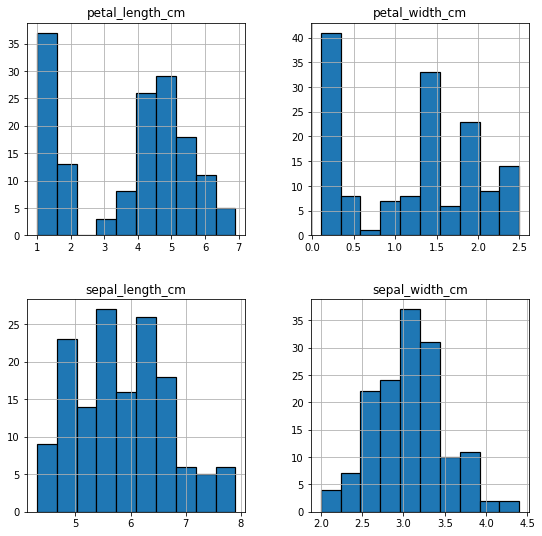

In [13]:
# Create histograms
ds.hist(edgecolor='black', linewidth=1.2, figsize=(9, 9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb809af36d8>,
      dtype=object)

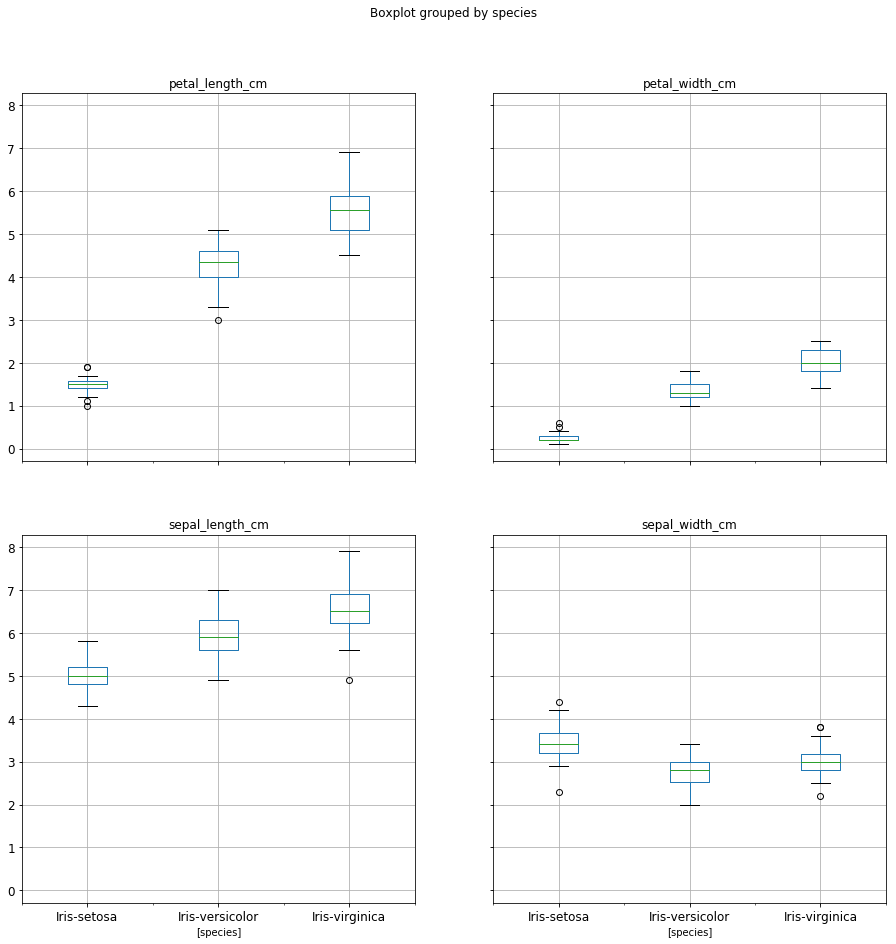

In [18]:
# Create boxplot on each feature split out by species
ds.boxplot(by="species", figsize=(15,15), fontsize="large")

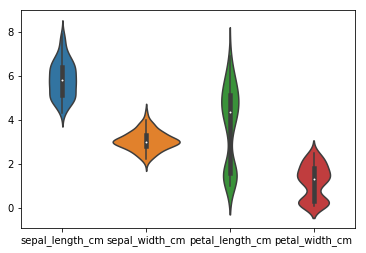

In [20]:
# Create violinplots on the `petal`-`length` columns for each species
sns.violinplot(data=ds, xy=("species", "petal_length_cm"))

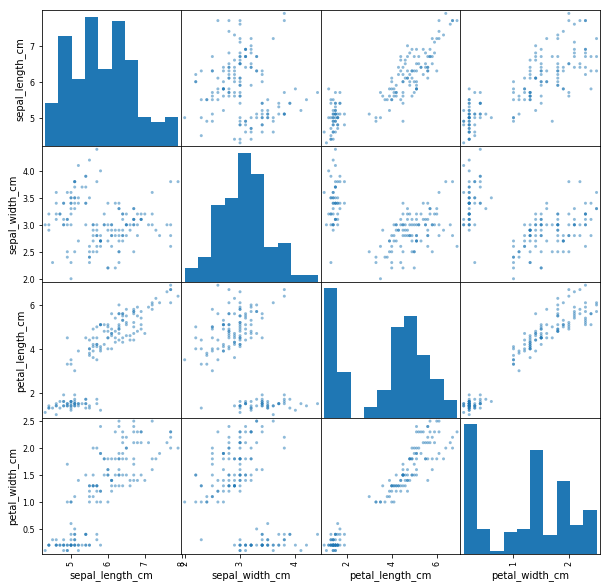

In [22]:
# Create scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(ds, figsize=(10, 10))
plt.show()

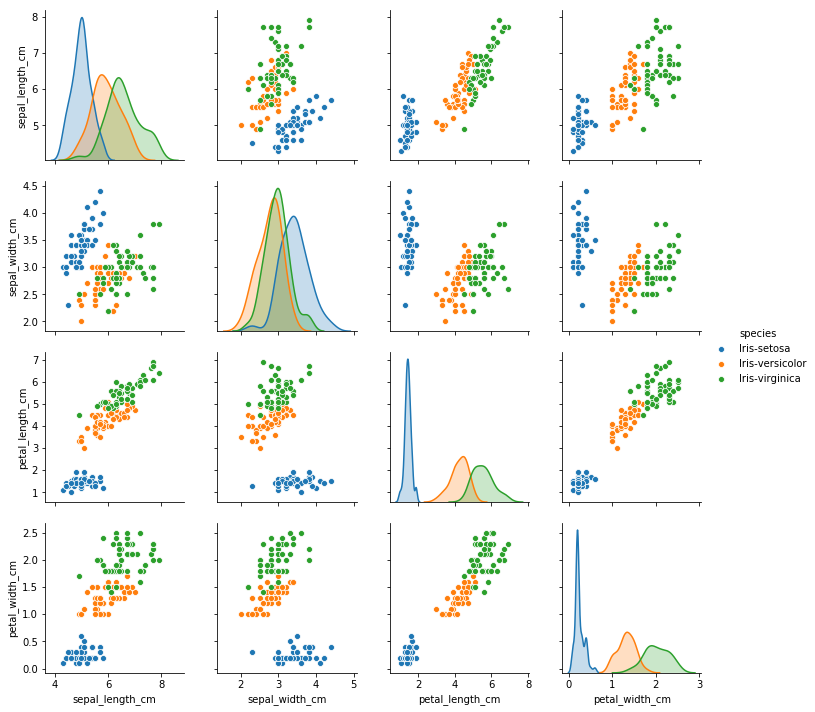

In [23]:
# Using `seaborn pairplot` to see the bivariate relation between each pair of features
sns.pairplot(ds, hue="species")

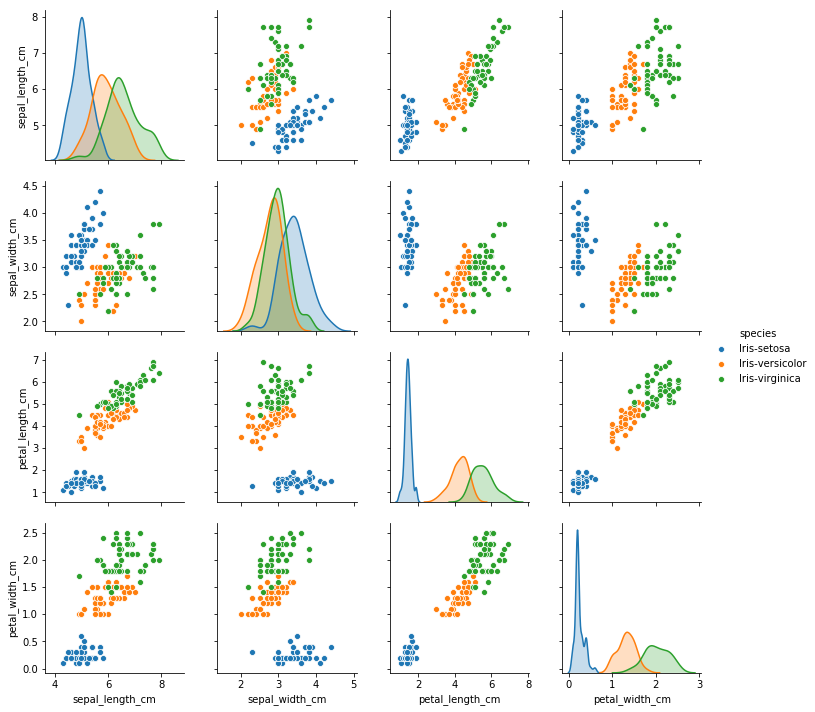

In [24]:
# From the plot, we can see that the species I. setosa is separataed from the others two across all feature combinations
# We can also replace the histograms shown in the diagonal of the pairplot by `kde`.
# Update the diagonal elements in a pairplot to show a `kde`
sns.pairplot(ds, hue="species", diag_kind="kde")

In [27]:
# Apply different classification models
# Import metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Separate the data into dependent and independent variables
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [39]:
# Split the dataset into the training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
# Perform a logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs", multi_class="auto", max_iter=9000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [41]:
# Get the summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [42]:
# Get the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is: {}".format(accuracy_score(y_pred, y_test)))

Accuracy is: 1.0


In [43]:
# Apply a naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [44]:
# Get report of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is: {}".format(accuracy_score(y_pred, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy is: 0.9666666666666667


In [46]:
# Apply the Support Vector Machine's algorithm
from sklearn.svm import SVC
classifier = SVC(gamma="auto")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [47]:
# Get report of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is: {}".format(accuracy_score(y_pred, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is: 1.0


In [48]:
# Apply the K-Nearest Neighbours algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Get report of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is: {}".format(accuracy_score(y_pred, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is: 1.0


In [49]:
# Apply the Decision Tree's algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Get report of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is: {}".format(accuracy_score(y_pred, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is: 1.0
